`Importing required libraries`

In [262]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import plotly.express as px, plotly.graph_objects as go
# To ignore warnings thrown by seaborn, plotly
import warnings
warnings.filterwarnings('ignore')

`Loading the data`

In [263]:
data = pd.read_csv('loan.csv')
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


`Checking how the data looks`

In [264]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Cleaning -

`Reomving the '%' symbol from int_rate column`

In [267]:
data['int_rate'] = data['int_rate'].apply(lambda x: float(x.replace('%','')))

`Reomving the word 'months' from the column term`

In [268]:
data.term = data.term.apply(lambda x: x.replace('months',''))
data.term = data.term.astype(int)

`Removing the word 'year' or 'years' from the column emp_length`

In [269]:
data['emp_length'] = data['emp_length'].astype(str).apply(lambda x: x.replace('years',''))
data['emp_length'] = data['emp_length'].apply(lambda x: x.replace('year',''))

`Dropping all the columns which has only null values`

In [270]:
data = data.dropna(how='all', axis=1)

`Checking the null value percentage of the remaining columns`

In [319]:
data_null = pd.DataFrame(data.isnull().sum())
data_null.index.name = "column_name"
data_null = data_null.reset_index()
data_null = data_null.rename(columns={0: 'null_count'})
data_null['Null Perecentage'] = data_null['null_count'].apply(lambda x: x/39717*100)
data_null[(data_null['null_count']!=0)]

,column_name,null_count,Null Perecentage
10,emp_title,2307,5.808596
19,desc,12417,31.263691
21,title,11,0.027696
25,pub_rec_bankruptcies,669,1.684417


`Since the columns 'mths_since_last_delinq','mths_since_last_record' and 'next_pymnt_d' has a very high percentage of null values, we can drop these columns`

In [272]:
data = data.drop(columns=['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'])

`Amongst the above list of columns only pub_rec_bankruptcies column's null values is only needed to be replaced since it has integer values`

In [273]:
round(data['pub_rec_bankruptcies'].mean(),1)

0.0

In [274]:
data['pub_rec_bankruptcies'].median()

0.0

In [275]:
data['pub_rec_bankruptcies'].mode()

0    0.0
Name: pub_rec_bankruptcies, dtype: float64

`since, pub_rec_bankruptcies has it's mean, mode and median as 0 therefore we can impute the null data as 0`

__Note__ - As for this assignment we are not allowed to impute data, therefore we haven't imputed data for pub_rec_bankruptcies column.

`Checking the current list of columns`

In [276]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

`Dropping the below columns since these columns are customer behaviour variables which will not be present for nee applicants at the time of loan application.`

In [277]:
data = data.drop(columns=['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc','out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d','application_type'])

`Checking what values are present in the following columns, since the first few rows had '0' as the only value`

In [279]:
data['initial_list_status'].value_counts()

f    39717
Name: initial_list_status, dtype: int64

In [280]:
data['collections_12_mths_ex_med'].value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [281]:
data['policy_code'].value_counts()

1    39717
Name: policy_code, dtype: int64

In [282]:
data['acc_now_delinq'].value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

In [283]:
data['chargeoff_within_12_mths'].value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [284]:
data['delinq_amnt'].value_counts()

0    39717
Name: delinq_amnt, dtype: int64

In [285]:
data['tax_liens'].value_counts()

0.0    39678
Name: tax_liens, dtype: int64

`Since the above columns has same values for all of its rows, we can not use it for analysis and therefore can be dropped.`

In [286]:
data = data.drop(columns=['initial_list_status','collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'])

# Removing Outliers -

`Removing outliers from the dataset based on the column anual_inc.`

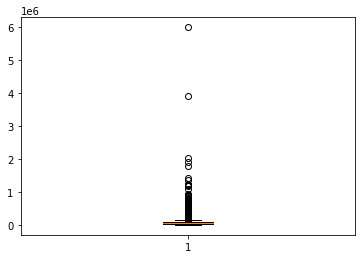

In [287]:
plt.boxplot(data['annual_inc'])
plt.show()

In [288]:
data = data[data['annual_inc']<=150000]

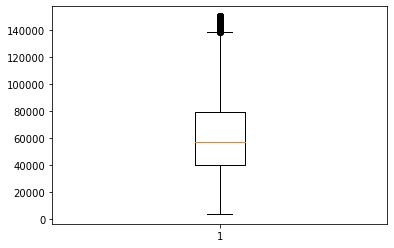

In [289]:
plt.boxplot(data['annual_inc'])
plt.show()

# Deriving New Column

`Adding a column 'Annual Income Bracket' to categorise the applicants based on annual income.`

In [290]:
def bracket(x):
    if x>0 and x<=25000:
        return '0 - 25000'
    elif x>25000 and x<=50000:
        return '25000 - 50000'
    elif x>50000 and x<=75000:
        return '50000 - 75000'
    elif x>75000 and x<=100000:
        return '75000 - 100000'
    elif x>100000 and x<=125000:
        return '100000 - 125000'
    elif x>125000 and x<=150000:
        return '125000 - 150000'
    else:
        return '150000+'
data['Annual Income Bracket'] = data['annual_inc'].apply(bracket)

`Checking the final dataset before starting Analysis.`

In [291]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38166 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38166 non-null  int64  
 1   member_id              38166 non-null  int64  
 2   loan_amnt              38166 non-null  int64  
 3   funded_amnt            38166 non-null  int64  
 4   funded_amnt_inv        38166 non-null  float64
 5   term                   38166 non-null  int64  
 6   int_rate               38166 non-null  float64
 7   installment            38166 non-null  float64
 8   grade                  38166 non-null  object 
 9   sub_grade              38166 non-null  object 
 10  emp_title              35859 non-null  object 
 11  emp_length             38166 non-null  object 
 12  home_ownership         38166 non-null  object 
 13  annual_inc             38166 non-null  float64
 14  verification_status    38166 non-null  object 
 15  is

`Distributing the dataset into two parts for easier analysis.`

__Note__ - People with loan_status as 'current' are currently in progress to pay the loan and therefore not relevant for our case study.

In [292]:
data_paid = data[data['loan_status']=='Fully Paid']
data_paid = data_paid.reset_index(drop=True)
data_defaulted = data[data['loan_status']=='Charged Off']
data_defaulted = data_defaulted.reset_index(drop=True)

`Checking the data_paid dataset.`

In [293]:
data_paid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31627 entries, 0 to 31626
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     31627 non-null  int64  
 1   member_id              31627 non-null  int64  
 2   loan_amnt              31627 non-null  int64  
 3   funded_amnt            31627 non-null  int64  
 4   funded_amnt_inv        31627 non-null  float64
 5   term                   31627 non-null  int64  
 6   int_rate               31627 non-null  float64
 7   installment            31627 non-null  float64
 8   grade                  31627 non-null  object 
 9   sub_grade              31627 non-null  object 
 10  emp_title              29851 non-null  object 
 11  emp_length             31627 non-null  object 
 12  home_ownership         31627 non-null  object 
 13  annual_inc             31627 non-null  float64
 14  verification_status    31627 non-null  object 
 15  is

`Checking the data_defaulted dataset.`

In [294]:
data_defaulted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5464 entries, 0 to 5463
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     5464 non-null   int64  
 1   member_id              5464 non-null   int64  
 2   loan_amnt              5464 non-null   int64  
 3   funded_amnt            5464 non-null   int64  
 4   funded_amnt_inv        5464 non-null   float64
 5   term                   5464 non-null   int64  
 6   int_rate               5464 non-null   float64
 7   installment            5464 non-null   float64
 8   grade                  5464 non-null   object 
 9   sub_grade              5464 non-null   object 
 10  emp_title              5001 non-null   object 
 11  emp_length             5464 non-null   object 
 12  home_ownership         5464 non-null   object 
 13  annual_inc             5464 non-null   float64
 14  verification_status    5464 non-null   object 
 15  issu

# Analysis -

`Analysing the distribution of Applied Loan Amount`

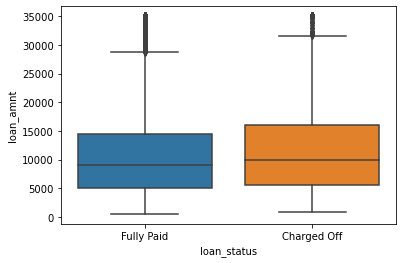

In [295]:
sns.boxplot(data=data[data['loan_status']!='Current'], x='loan_status', y='loan_amnt')
plt.show()

__Insight -__
_If the applied loan amount is high there's a slight chance that the person will default._

`Analysing how the difference between the funded amount by the investor and the applied loan amount drives the chances of defaulting or paying the amount fully.`

In [296]:
count_list = []
count_list.insert(1, len(data_paid[data_paid['funded_amnt_inv']<data_paid['loan_amnt']]))
count_list.insert(2 ,len(data_paid[data_paid['funded_amnt_inv']==data_paid['loan_amnt']]))
count_list

[15792, 15835]

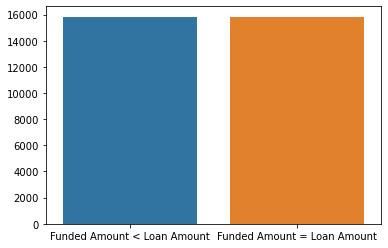

In [297]:
sns.barplot(['Funded Amount < Loan Amount','Funded Amount = Loan Amount'],count_list)
plt.show()

In [298]:
count_list = []
count_list.insert(1, len(data_defaulted[data_defaulted['funded_amnt_inv']<data_defaulted['loan_amnt']]))
count_list.insert(2 ,len(data_defaulted[data_defaulted['funded_amnt_inv']==data_defaulted['loan_amnt']]))
count_list

[2815, 2649]

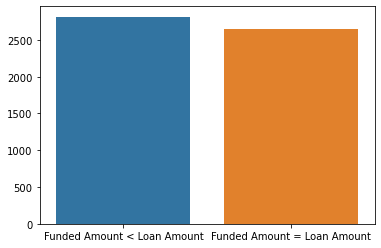

In [299]:
sns.barplot(['Funded Amount < Loan Amount','Funded Amount = Loan Amount'],count_list)
plt.show()

__Insight -__
_Chances of defaulting slightly increases when funded amount is less than applied loan amount._

`Analysing how the interest rate drives the chances of an applicant to pay the amount fully or defaulting.`

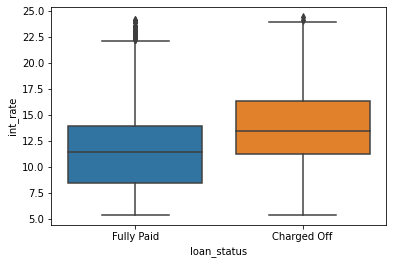

In [301]:
sns.boxplot(data=data[data['loan_status']!='Current'], x='loan_status', y='int_rate')
plt.show()

__Insight -__
_A lower rate of interest is likely to be fully paid than charged off._

`Analysing how the term of loan repayment drives the chances of an applicant to pay the amount fully or defaulting.`

In [320]:
data_term_paid = pd.DataFrame(data_paid.term.value_counts())
data_term_paid = data_term_paid.rename(columns={'term': 'paid_term'})
data_term_paid['Fully Paid'] = data_term_paid['paid_term'].apply(lambda x: round(x/len(data_paid)*100,2))

data_term_defaulted = pd.DataFrame(data_defaulted.term.value_counts())
data_term_defaulted = data_term_defaulted.rename(columns={'term': 'deafulted_term'})
data_term_defaulted['Defaulted'] = data_term_defaulted['deafulted_term'].apply(lambda x: round(x/len(data_defaulted)*100,2))
data_term = pd.concat([data_term_paid, data_term_defaulted], axis=1)
data_term

,paid_term,Fully Paid,deafulted_term,Defaulted
36,24902,78.74,3141,57.49
60,6725,21.26,2323,42.51


In [321]:
fig = px.bar(data_term, x=data_term.index, y=['Fully Paid','Defaulted'],
             labels={'index':'Term', 'value': 'Applicant Percentage %'}, barmode='group')
fig.show()

__Insight -__
_Chances of defaulting increases when the loan repayment term is 60 months._

`Analysing how the grade drives the chances of an applicant to pay the amount fully or defaulting.`

In [304]:
data_grade_paid = pd.DataFrame(data_paid.grade.value_counts())
data_grade_paid = data_grade_paid.rename(columns={'grade': 'paid_grade'})
data_grade_paid['Fully Paid'] = data_grade_paid['paid_grade'].apply(lambda x: round(x/len(data_paid)*100,2))
data_grade_defaulted = pd.DataFrame(data_defaulted.grade.value_counts())
data_grade_defaulted = data_grade_defaulted.rename(columns={'grade': 'deafulted_grade'})
data_grade_defaulted['Defaulted'] = data_grade_defaulted['deafulted_grade'].apply(lambda x: round(x/len(data_defaulted)*100,2))
data_grade = pd.concat([data_grade_paid, data_grade_defaulted], axis=1)
data_grade

,paid_grade,Fully Paid,deafulted_grade,Defaulted
B,9847,31.13,1386,25.37
A,9159,28.96,597,10.93
C,6220,19.67,1330,24.34
D,3795,12.00,1088,19.91
E,1823,5.76,670,12.26
F,606,1.92,297,5.44
G,177,0.56,96,1.76


In [305]:
fig = px.bar(data_grade, x=data_grade.index, y=['Fully Paid','Defaulted'],
             labels={'index':'Grade', 'value': 'Applicant Percentage %'}, barmode='group')
fig.show()


__Insight -__
_Chances of deafulting are much higher for grades B and C followed by D compared to other grades. Also, chances of Fully paiying is comparatively higher for grades B and A whose corresponding default percentage is lower. Therefore Grade A followed by B has lower chance of defaulting._

`Analysing how the sub-grade drives the chances of an applicant to pay the amount fully or defaulting.`

In [306]:
data_grade_paid = pd.DataFrame(data_paid['sub_grade'].value_counts())
data_grade_paid = data_grade_paid.rename(columns={'sub_grade': 'paid_grade'})
data_grade_paid['Fully Paid'] = data_grade_paid['paid_grade'].apply(lambda x: round(x/len(data_paid)*100,2))
data_grade_defaulted = pd.DataFrame(data_defaulted['sub_grade'].value_counts())
data_grade_defaulted = data_grade_defaulted.rename(columns={'sub_grade': 'deafulted_grade'})
data_grade_defaulted['Defaulted'] = data_grade_defaulted['deafulted_grade'].apply(lambda x: round(x/len(data_defaulted)*100,2))
data_grade = pd.concat([data_grade_paid, data_grade_defaulted], axis=1)
data_grade

,paid_grade,Fully Paid,deafulted_grade,Defaulted
A4,2604,8.23,177,3.24
A5,2424,7.66,213,3.90
B3,2372,7.50,329,6.02
B5,2170,6.86,353,6.46
B4,2033,6.43,320,5.86
B2,1701,5.38,217,3.97
A3,1661,5.25,103,1.89
C1,1655,5.23,330,6.04
B1,1571,4.97,167,3.06
C2,1544,4.88,318,5.82


In [307]:
fig = px.bar(data_grade, x=data_grade.index, y=['Fully Paid','Defaulted'],
             labels={'index':'Sub Grade', 'value': 'Applicant Percentage %'}, barmode='group')
fig.show()

__Insight -__
_Ratio of Appllicants fully paying to defaulting is much higher at sub grades A4, A5, A3, B1, A2. Therefore this five sub grades has lower risk of defaulting._

`Analysing how the employment length of the applicant drives the chances of an applicant to pay the amount fully or defaulting.`

In [308]:
data_emp_length = pd.DataFrame(data_paid['emp_length'].value_counts())
data_emp_length = data_emp_length.rename(columns={'emp_length': 'paid empl_length'})
data_emp_length['Fully Paid'] = data_emp_length['paid empl_length'].apply(lambda x: round(x/len(data_paid)*100,2))

data_emp_length2 = pd.DataFrame(data_defaulted['emp_length'].value_counts())
data_emp_length2 = data_emp_length2.rename(columns={'emp_length': 'deafulted empl_length'})
data_emp_length2['Defaulted'] = data_emp_length2['deafulted empl_length'].apply(lambda x: round(x/len(data_defaulted)*100,2))
data_emp = pd.concat([data_emp_length, data_emp_length2], axis=1)
data_emp

,paid empl_length,Fully Paid,deafulted empl_length,Defaulted
10+,6738,21.30,1285,23.52
< 1,3759,11.89,623,11.40
2,3587,11.34,551,10.08
3,3329,10.53,540,9.88
4,2782,8.80,450,8.24
5,2634,8.33,443,8.11
1,2622,8.29,451,8.25
6,1795,5.68,297,5.44
7,1405,4.44,252,4.61
8,1165,3.68,195,3.57


In [309]:
fig = px.bar(data_emp[data_emp.index!='nan'], x=data_emp[data_emp.index!='nan'].index, y=['Fully Paid','Defaulted'],
             labels={'x':'Employment Length', 'value': 'Applicant Percentage %'}, barmode='group')
fig.show()

__Insight -__
_Chances of defaulting is comparatively the same as chances of paying fully based on employment length, except applicant with 10+ and 7 years of employment length where the risks of defaulting is slightly higher._

`Analysing how the type of home ownership of the applicant drives the chances of an applicant to pay the amount fully or defaulting.`

In [310]:
data_home_paid = pd.DataFrame(data_paid['home_ownership'][data_paid['home_ownership']!='NONE'].value_counts())
data_home_paid = data_home_paid.rename(columns={'home_ownership': 'paid home_ownership'})
data_home_paid['Fully Paid'] = data_home_paid['paid home_ownership'].apply(lambda x: round(x/len(data_paid)*100,2))

data_home_defaulted = pd.DataFrame(data_defaulted['home_ownership'].value_counts())
data_home_defaulted = data_home_defaulted.rename(columns={'home_ownership': 'deafulted home_ownership'})
data_home_defaulted['Defaulted'] = data_home_defaulted['deafulted home_ownership'].apply(lambda x: round(x/len(data_defaulted)*100,2))

data_home = pd.concat([data_home_paid, data_home_defaulted], axis=1)
data_home

,paid home_ownership,Fully Paid,deafulted home_ownership,Defaulted
RENT,15347,48.52,2788,51.02
MORTGAGE,13759,43.50,2221,40.65
OWN,2442,7.72,438,8.02
OTHER,76,0.24,17,0.31


In [311]:
fig = px.bar(data_home, x=data_home.index, y=['Fully Paid','Defaulted'],
             labels={'index':'Home Ownership Status', 'value': 'Applicant Percentage %'}, barmode='group')
fig.show()

__Insight -__
_Chances of defaulting is slightly higher for applicants who have home as rented._

`Analysing how the type of annual income of the applicant drives the chances of an applicant to pay the amount fully or defaulting.`

In [312]:
annual_inc_paid = np.array(data_paid['Annual Income Bracket'])
annual_inc_defaulted = np.array(data_defaulted['Annual Income Bracket'])

fig = go.Figure()
fig.add_trace(go.Histogram(
    x=annual_inc_paid,
    histnorm='percent',
    name='Fully Paid',
    marker_color='#EB89B5',
    opacity=0.75
))
fig.add_trace(go.Histogram(
    x=annual_inc_defaulted,
    histnorm='percent',
    name='Defaulted',
    marker_color='#330C73',
    opacity=0.75
))

fig.update_layout(
    title_text='Distribution of Annual Income', # title of plot
    xaxis_title_text='Income Bracket', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)

fig.show()

__Insight -__
_Applicants with anual income of 100000 and higher is likely to pay the loan amount whereas applicants with anual income of 50000 and lesser is likely to default. Applicants with a annual income ranging from 50000 - 75000 has 50-50 chances of paying and defaulting._

`Analysing how the type of verification status of the applicant drives the chances of an applicant to pay the amount fully or defaulting.`

In [315]:
data_status_paid = pd.DataFrame(data_paid['verification_status'][data_paid['verification_status']!='NONE'].value_counts())
data_status_paid = data_status_paid.rename(columns={'verification_status': 'paid verification_status'})
data_status_paid['Fully Paid'] = data_status_paid['paid verification_status'].apply(lambda x: round(x/len(data_paid)*100,2))

data_status_defaulted = pd.DataFrame(data_defaulted['verification_status'].value_counts())
data_status_defaulted = data_status_defaulted.rename(columns={'verification_status': 'deafulted verification_status'})
data_status_defaulted['Defaulted'] = data_status_defaulted['deafulted verification_status'].apply(lambda x: round(x/len(data_defaulted)*100,2))

data_status = pd.concat([data_status_paid, data_status_defaulted], axis=1)
data_status

,paid verification_status,Fully Paid,deafulted verification_status,Defaulted
Not Verified,14287,45.17,2108,38.58
Verified,9463,29.92,1971,36.07
Source Verified,7877,24.91,1385,25.35


In [317]:
fig = px.bar(data_status, x=data_status.index, y=['Fully Paid','Defaulted'],
             labels={'index':'Verification Status', 'value': 'Applicant Percentage %'}, barmode='group')
fig.show()

__Insight -__
_Applicants with verification status as not verified are likely to pay the loan amount, wheareas applicants with a verfication status of verified are likely to default. Applicants with verification status as Source Verified has 50-50 chances to pay or default._